<a href="https://colab.research.google.com/github/3simransharma/Predicting_house_prizes/blob/main/predicting_the_prize_of_houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# uploaded = files.upload()

In [28]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(train_df.describe())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

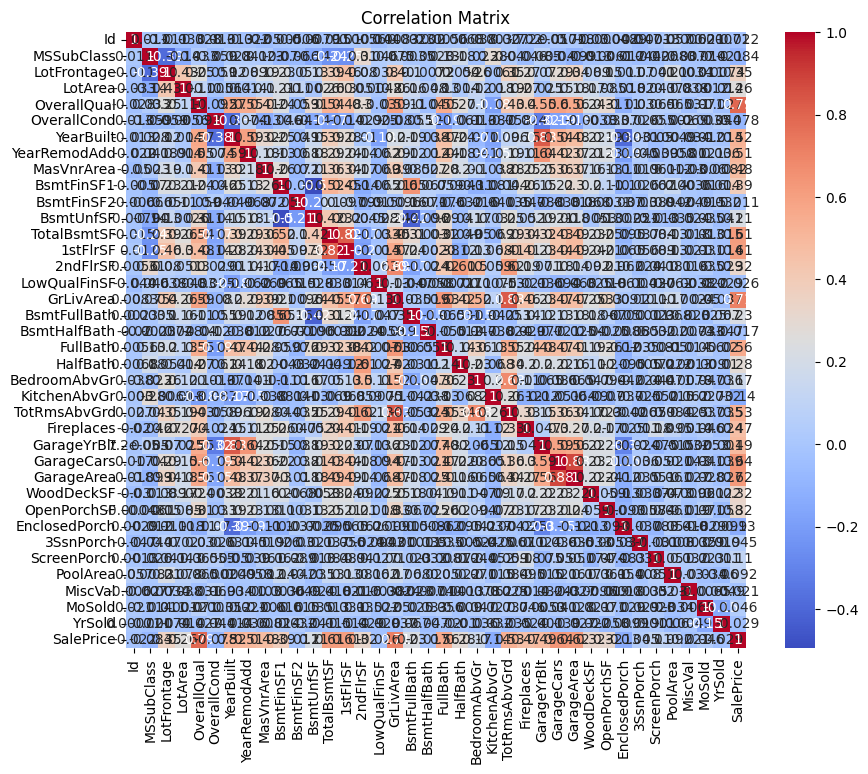

In [29]:
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [30]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

train_df = train_df[features + [target]].dropna()
test_df = test_df[features].dropna()

X_train = train_df[features]
y_train = train_df[target]

In [31]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train_split, y_train_split)

LinearRegression()

In [33]:
y_val_pred = model.predict(X_val_split)
mse = mean_squared_error(y_val_split, y_val_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2806426667.247853


In [35]:

test_X = test_df[features]

test_predictions = model.predict(test_X)
submission = pd.DataFrame({'Id': test_df.index, 'SalePrice': test_predictions})
print(submission.head())

submission.to_csv('submission_usd.csv', index=False)

# files.download('submission_usd.csv')


   Id      SalePrice
0   0  122173.313104
1   1  140561.538683
2   2  201783.754896
3   3  199183.097221
4   4  192133.739106
